# Codes from Kaggle
### https://www.kaggle.com/code/kodchalerkmoolkul/customer-churn-prediction-and-clustering-analysis

In [1]:
# Importing modules 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

In [2]:
#importing datasets
train = pd.read_csv("customer_churn_dataset-training-master.csv")
test = pd.read_csv("customer_churn_dataset-testing-master.csv")

# Combinding the datasets 
df = pd.concat([train, test])

I will skip most of the data inspection and everything in regards to this. You'll find this in the final code file

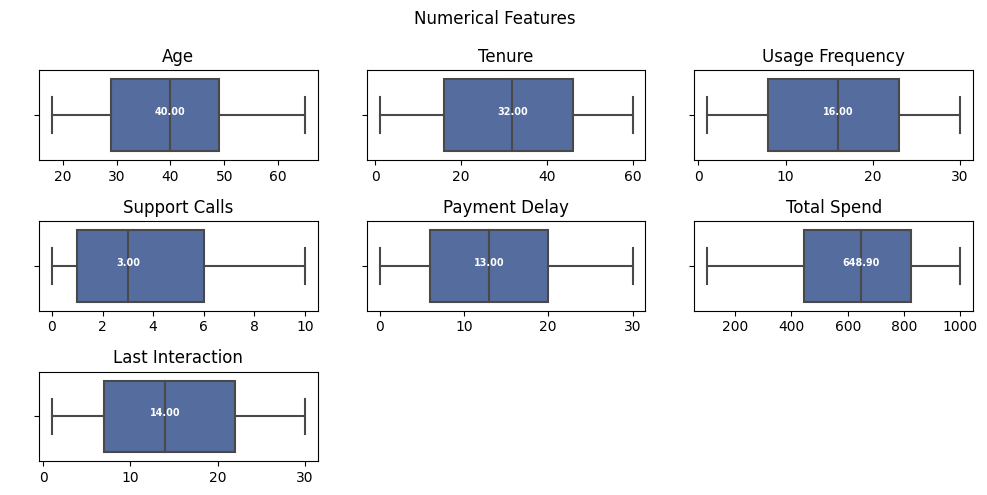

In [52]:
# Check numerical columns
col_features = df.select_dtypes(['float64', 'int64'])
col_features = col_features[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']]

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Numerical Features')

# Define the custom color using the hex code
custom_color = '#4967AA'

for i, j in enumerate(col_features):
    ax = fig.add_subplot(3, 3, i + 1)
    
    # Use the specified custom color for boxplots
    ax = sns.boxplot(data=col_features, x=j, color=custom_color)
    
    # Calculate median for all customers
    median = df[j].median()
    
    # Plot median in the graph with formatting
    ax.text(median, ax.get_yticks(), s='{:.2f}'.format(median), horizontalalignment='center',
            size='x-small', color='w', weight='semibold')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

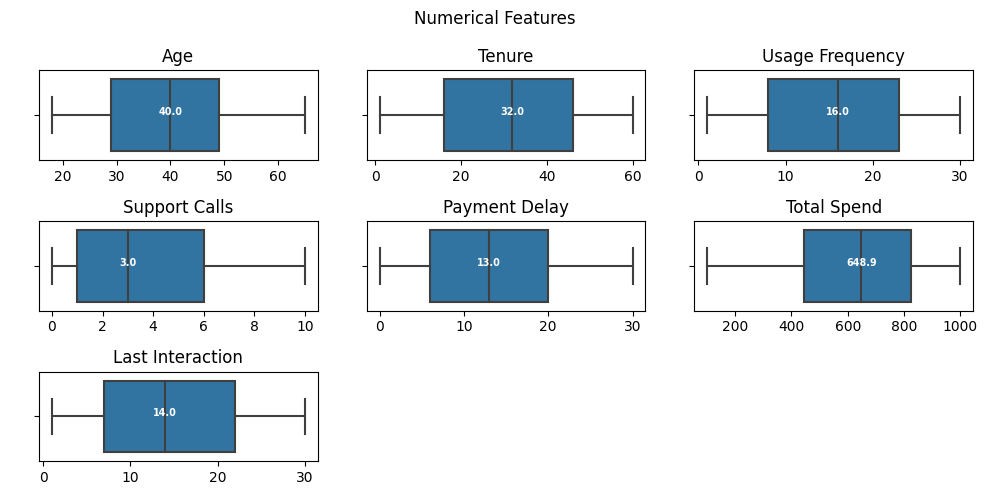

In [33]:
# Check numerical columns
col_features = df.select_dtypes(['float64' , 'int64'])
col_features = col_features[['Age', 'Tenure', 'Usage Frequency', 'Support Calls','Payment Delay', 'Total Spend', 'Last Interaction']]
#Create font


fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features')
for i,j in enumerate(col_features):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = col_features , x = j)
    #Calculate median
    median = df[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median)  ,horizontalalignment='center',size='x-small',color='w',weight='semibold')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()

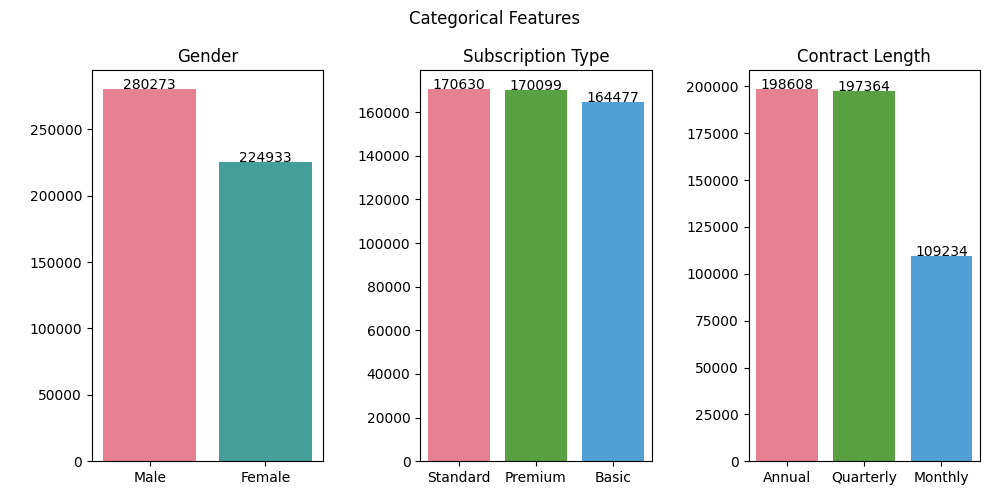

In [34]:
col_categorical = df.select_dtypes('object')

fig = plt.figure(figsize = (10,5))
fig.suptitle('Categorical Features')
for i,j in enumerate(col_categorical):
    ax = fig.add_subplot(1,3,i+1)
    #Recalculate data frame
    ax = sns.barplot(data = df[j].value_counts().sort_values(ascending = False).to_frame() ,x = df[j].value_counts().sort_values(ascending = False).to_frame().index, y = j , palette = 'husl' )
    #Create text
    text = df[j].value_counts()
    for x,y in enumerate(text):
        ax.text(x,y,y,horizontalalignment='center')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)
    
plt.tight_layout()

In [3]:
# Drop missing value
df.dropna(axis = 0 , inplace = True)

### Logistic Regression 

#### Preprocessing for Logistic Regression

In [4]:
df2 = df.copy()
df2

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [5]:
# Drop unused column
df2.drop(columns = 'CustomerID' , inplace = True)

In [6]:
df2

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
64370,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
64371,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
64372,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [7]:
# Creating dummy variables for the categorical variables
df2 = pd.get_dummies(df2, columns=['Subscription Type'], prefix='Subscription Type')
df2 = pd.get_dummies(df2, columns=['Gender'], prefix='Gender')
df2 = pd.get_dummies(df2, columns=['Contract Length'], prefix='Contract Length')

In [8]:
df2

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Gender_Female,Gender_Male,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,0,0,1,1,0,1,0,0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,0,1,0,0,1,0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,1,0,0,1,0,0,0,1
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,0,0,1,0,1,0,1,0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45.0,33.0,12.0,6.0,21.0,947.0,14.0,1.0,1,0,0,1,0,0,0,1
64370,37.0,6.0,1.0,5.0,22.0,923.0,9.0,1.0,0,0,1,0,1,1,0,0
64371,25.0,39.0,14.0,8.0,30.0,327.0,20.0,1.0,0,1,0,0,1,0,1,0
64372,50.0,18.0,19.0,7.0,22.0,540.0,13.0,1.0,0,0,1,1,0,0,1,0


In [9]:
# Scaling the numerical features 
# Numerical features
num = df2[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
           'Payment Delay', 'Total Spend', 'Last Interaction']]

# Scaler 
scaler = StandardScaler()
scaled_num = scaler.fit_transform(num)  # Scale the numerical features

# Replace the original columns with scaled values
df2[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
     'Payment Delay', 'Total Spend', 'Last Interaction']] = scaled_num


df2.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Gender_Female,Gender_Male,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,-0.765883,0.443776,-0.198951,0.372314,0.532844,1.271517,0.277572,1.0,0,0,1,1,0,1,0,0
1,1.996425,1.023907,-1.707192,1.967923,-0.650423,-0.257105,-1.000267,1.0,1,0,0,1,0,0,1,0
2,1.207194,-1.006554,-1.359137,0.691436,0.532844,-1.773498,-1.348769,1.0,1,0,0,1,0,0,0,1
3,1.443963,0.385762,0.613178,1.010558,-0.768750,-0.913393,1.671579,1.0,0,0,1,0,1,0,1,0
4,-1.318345,0.037683,0.497160,0.372314,-0.650423,-0.012526,0.626074,1.0,1,0,0,0,1,0,1,0


In [17]:
# defining independet variables and target variable 
X = df2[['Support Calls', 'Total Spend', 'Payment Delay', 'Tenure', 'Age', 'Usage Frequency', 'Last Interaction']]
#X = df2.drop(columns=['Churn'])
y = df2['Churn']

# Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.3 , random_state = 45)

In [91]:
y.isna().sum()

0

In [94]:
Y_train.isna().sum()

0

In [18]:
# Check the shapes of each dataframe.
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(353644, 7) (151562, 7) (353644,) (151562,)


In [12]:
# We will perform feature selection by using feature importance method.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 25 , random_state = 45)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=25, random_state=45)

<AxesSubplot: >

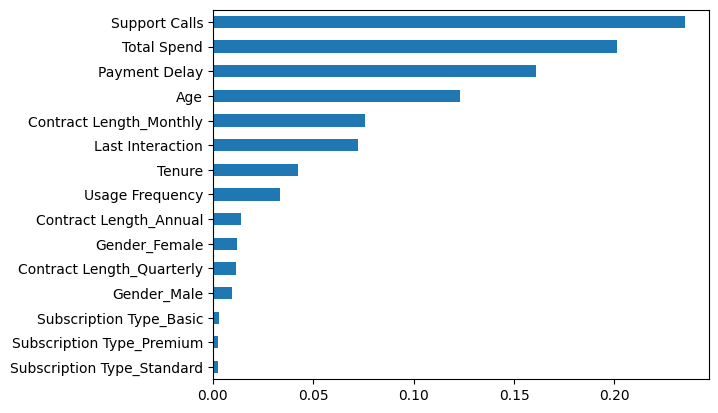

In [101]:
featureimp = pd.Series(model.feature_importances_ , index = X.columns).sort_values(ascending = True)
featureimp.plot(kind = 'barh')

#### Logistic Regression classification

In [19]:
# Evaluation function that prints classification report and confusion matrix
def evaluate(y_test, y_pred, model_name):
    # Creating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Priting the model name
    print(f"\033[34m{model_name}\033[0m")

    # Print the classification report
    print(f" \033[32mClassification Report:\033[0m")
    print(classification_report(y_test, y_pred))
    print(f" \033[32mConfusion Matrix:\033[0m")
    
    # Print the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Logistic Regression: Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [20]:
# Initialising Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

LogisticRegression()
 Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79     67430
         1.0       0.84      0.82      0.83     84132

    accuracy                           0.81    151562
   macro avg       0.81      0.81      0.81    151562
weighted avg       0.81      0.81      0.81    151562

 Confusion Matrix:


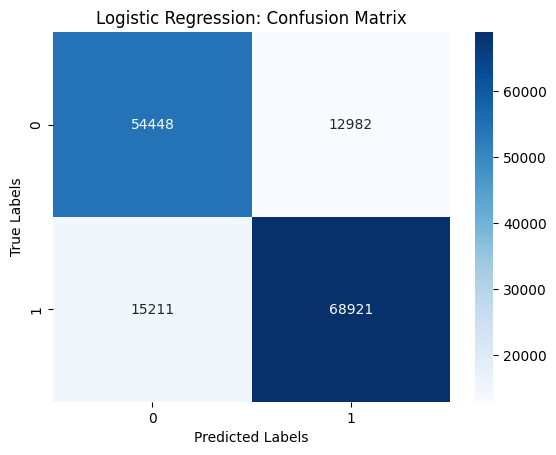

In [21]:
y_pred = lr.predict(X_test)
# Evaluating the results 
evaluate(Y_test, y_pred, lr)

#### Feature importance

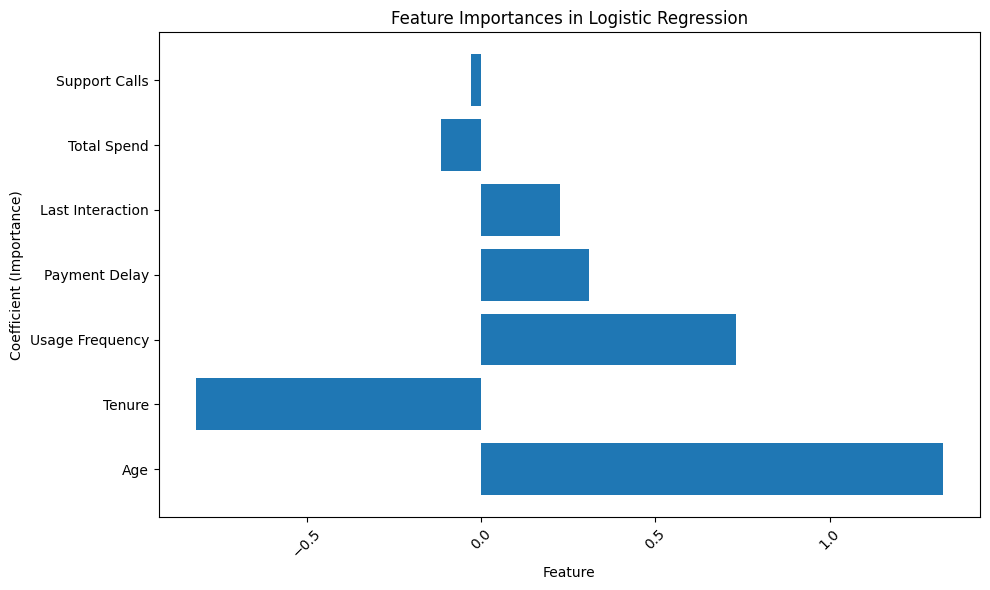

In [22]:
# Feature importance 
#getting the coefficients 
coef = lr.coef_[0]

#getting the absolute values of coefficients for ranking 
abs_coef = np.abs(coef)

#sorting the features after importance
sorted_indices = np.argsort(abs_coef)[::-1]
sorted_coef = coef[sorted_indices]

#getting feature names
feature_names = list(df2.columns)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), sorted_coef, tick_label=[feature_names[i] for i in sorted_indices])
plt.xlabel('Feature')
plt.ylabel('Coefficient (Importance)')
plt.title('Feature Importances in Logistic Regression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

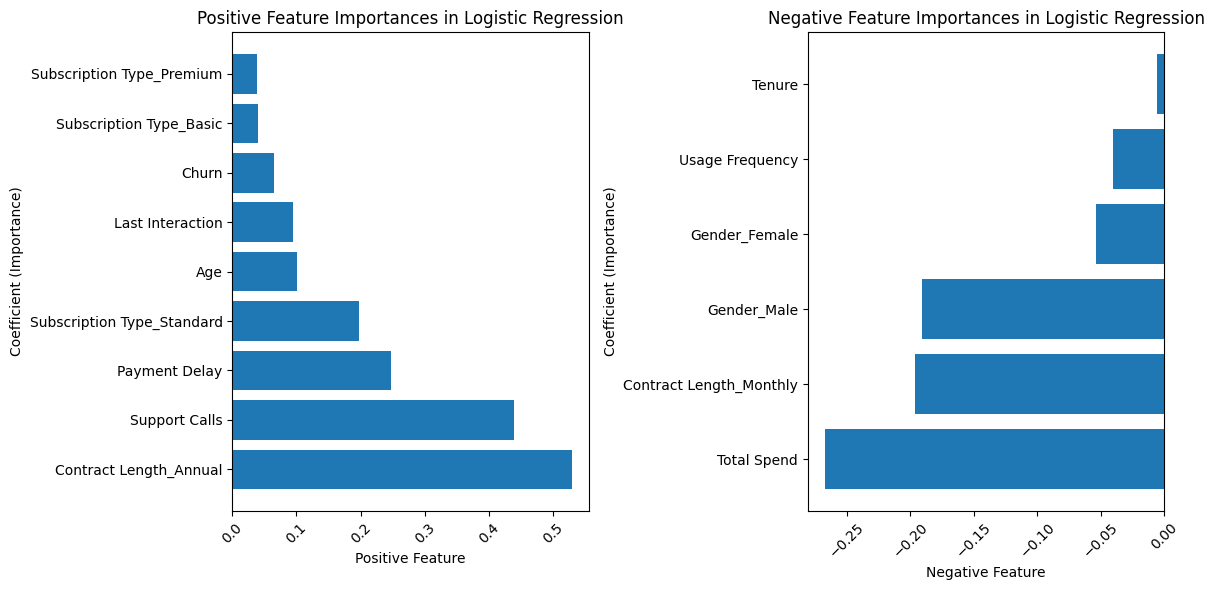

In [90]:
# Getting the coefficients 
coef = lr.coef_[0]

# Get the indices of positive and negative coefficients
positive_indices = np.where(coef > 0)[0]
negative_indices = np.where(coef < 0)[0]

# Sorting positive coefficients in descending order
sorted_positive_indices = np.argsort(coef[positive_indices])[::-1]
sorted_positive_coef = coef[positive_indices][sorted_positive_indices]

# Sorting negative coefficients in descending order
sorted_negative_indices = np.argsort(coef[negative_indices])
sorted_negative_coef = coef[negative_indices][sorted_negative_indices]

# Getting feature names (assuming your features are stored in a DataFrame named 'df2')
feature_names = list(df2.columns)

# Create two separate bar charts for positive and negative coefficients
plt.figure(figsize=(12, 6))

# Positive coefficients
plt.subplot(1, 2, 1)
plt.barh(range(len(sorted_positive_indices)), sorted_positive_coef, 
        tick_label=[feature_names[i] for i in positive_indices[sorted_positive_indices]])
plt.xlabel('Positive Feature')
plt.ylabel('Coefficient (Importance)')
plt.title('Positive Feature Importances in Logistic Regression')
plt.xticks(rotation=45)

# Negative coefficients
plt.subplot(1, 2, 2)
plt.barh(range(len(sorted_negative_indices)), sorted_negative_coef, 
        tick_label=[feature_names[i] for i in negative_indices[sorted_negative_indices]])
plt.xlabel('Negative Feature')
plt.ylabel('Coefficient (Importance)')
plt.title('Negative Feature Importances in Logistic Regression')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [64]:
coef = lr.coef_[0]

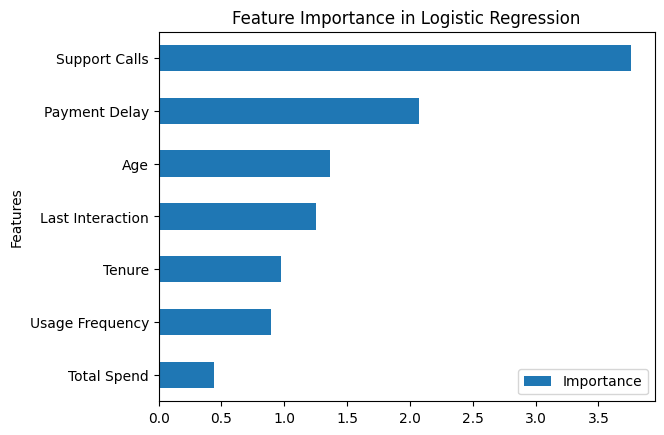

In [38]:
# Feature importance
feature_names = list(X.columns)
feature_importance = pd.DataFrame(feature_names, columns=['Features'])
feature_importance['Importance'] = pow(math.e, coef)
feature_importance = feature_importance.sort_values(by=['Importance'], ascending=True)

ax = feature_importance.plot.barh(x='Features', y='Importance')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Churn Risk Rating 

In [23]:
# Predict probabilities for test data
predicted_probabilities = lr.predict_proba(X_test)[:, 1]

# Define churn risk bucket boundaries (adjust as needed)
bucket_boundaries = np.linspace(0, 1, num=11)  # 10 buckets

# Assign customers to churn risk buckets
churn_risk_buckets = np.digitize(predicted_probabilities, bucket_boundaries)

In [24]:
X_test['Churn Risk'] = churn_risk_buckets

   Churn Risk Bucket  Number of Customers
0                  1                12344
1                  2                19439
2                  3                15173
3                  4                12434
4                  5                10269
5                  6                 9647
6                  7                 9542
7                  8                11140
8                  9                15920
9                 10                35654


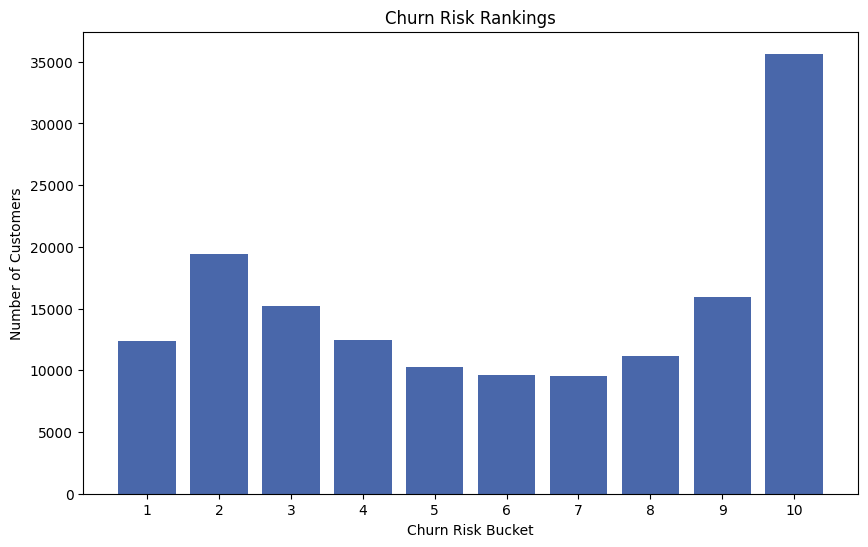

In [54]:
# Create a DataFrame to store churn risk rankings
churn_risk_df = pd.DataFrame({'CustomerID': X_test.index, 'Churn Risk': churn_risk_buckets})

# Count the number of customers in each bucket
bucket_counts = churn_risk_df['Churn Risk'].value_counts().sort_index()

# Create a table to display churn risk rankings
churn_risk_table = pd.DataFrame({'Churn Risk Bucket': bucket_counts.index, 'Number of Customers': bucket_counts.values})

# Sort the table by churn risk bucket
churn_risk_table = churn_risk_table.sort_values(by='Churn Risk Bucket')

# Display the churn risk table
print(churn_risk_table)

# Create a bar chart to visualize churn risk rankings
plt.figure(figsize=(10, 6))
custom_color = '#4967AA'  # Define the custom color using the hex code
plt.bar(churn_risk_table['Churn Risk Bucket'], churn_risk_table['Number of Customers'], color=custom_color)
plt.xlabel('Churn Risk Bucket')
plt.ylabel('Number of Customers')
plt.title('Churn Risk Rankings')
plt.xticks(churn_risk_table['Churn Risk Bucket'])
plt.show()

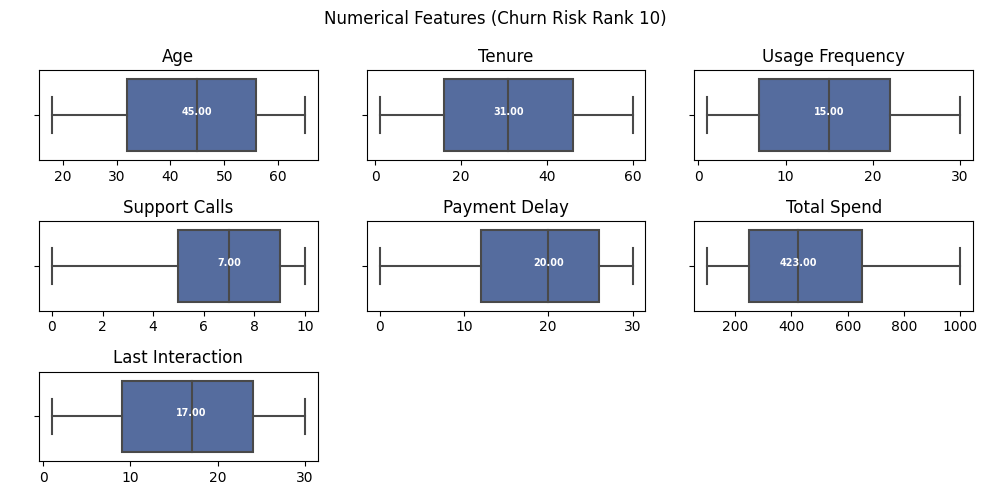

In [58]:
# Check numerical columns
col_features = df.select_dtypes(['float64', 'int64'])
col_features = col_features[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']]

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Numerical Features (Churn Risk Rank 10)')

# Define the custom color using the hex code
custom_color = '#4967AA'

for i, j in enumerate(col_features_rank_10):
    ax = fig.add_subplot(3, 3, i + 1)
    
    # Use the specified custom color for boxplots
    ax = sns.boxplot(data=col_features_rank_10, x=j, color=custom_color)
    
    # Calculate median for rank 10 customers
    median = col_features_rank_10[j].median()
    
    # Plot median in the graph with formatting
    ax.text(median, ax.get_yticks(), s='{:.2f}'.format(median), horizontalalignment='center',
            size='x-small', color='w', weight='semibold')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()


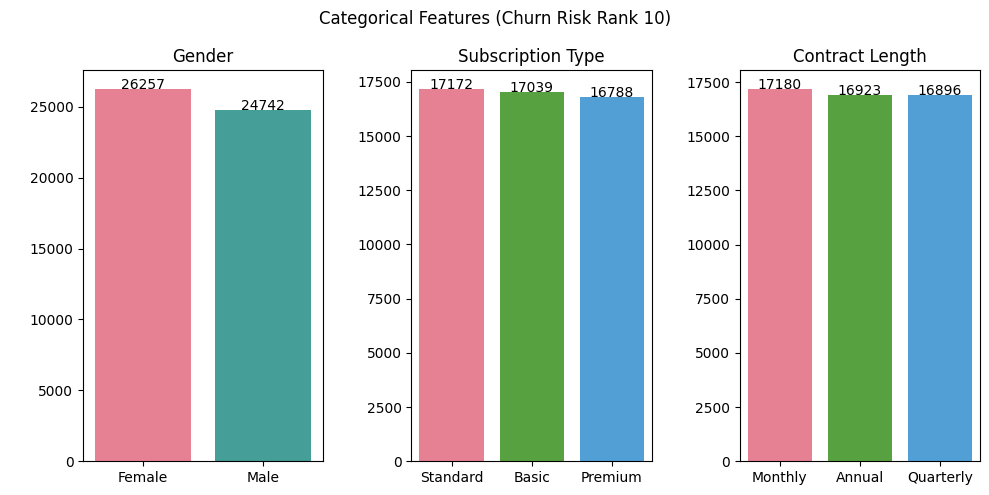

In [42]:
# Filter the dataset for customers in rank 10 (highest churn risk)
df_rank_10 = df.loc[rank_10_indices]

# Select categorical columns for formatting
col_categorical = df_rank_10.select_dtypes('object')

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Categorical Features (Churn Risk Rank 10)')

for i, j in enumerate(col_categorical):
    ax = fig.add_subplot(1, 3, i + 1)
    
    # Recalculate data frame for the specific column
    value_counts_df = df_rank_10[j].value_counts().sort_values(ascending=False).to_frame()
    
    # Create barplot
    ax = sns.barplot(data=value_counts_df, x=value_counts_df.index, y=j, palette='husl')
    
    # Create text annotations
    text = value_counts_df[j]
    for x, y in enumerate(text):
        ax.text(x, y, y, horizontalalignment='center')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()